### 1. Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

In [2]:
#Functions for Plotting
#Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#Heatmap
#A heatmap is a graphical representation of data that uses color coding to represent different values
def plot_heatmap(data, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.show()
    
#Roc Curve
# to check the performance of classification algorithms
def plot_roc_curve(y_true, y_probs, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc = roc_auc_score(y_true, y_probs)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
#Precision Curve
#Precision Recall Curve shows the tradeoff between precision and recall for different threshold
def plot_precision_recall_curve(y_true, y_probs, title):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    auc_score = auc(recall, precision)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}')
    plt.title(title)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()


### 2. Importing the Dataset

In [3]:
data1 = pd.read_csv("D:/presidency university/4th year/Project/heart.csv")
data2 = pd.read_csv("D:/presidency university/4th year/Project/heartttt.csv")
#data3 = pd.read_csv("D:/presidency university/4th year/Project/Heart_disease_statlog.csv")
data= pd.concat([data1, data2], axis=0)

In [4]:
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1328 non-null   int64  
 4   chol      1328 non-null   int64  
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1328 non-null   int64  
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 155.6 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,54.418675,0.692771,0.948042,131.614458,246.060241,0.149096,0.529367,149.235693,0.334337,1.064232,1.388554,0.748494,2.321536,0.520331
std,9.071150,0.461519,1.029854,17.514997,51.627522,0.356318,0.527220,22.975286,0.471936,1.171519,0.617203,1.028603,0.618543,0.499775
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3. Taking Care of Missing Values

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. Taking Care of Duplicate Values

In [8]:
data_dup = data.duplicated().any()

In [9]:
data_dup

True

In [10]:
data = data.drop_duplicates()

In [11]:
data_dup = data.duplicated().any()

In [12]:
data_dup

False

### 5. Data Processing

In [13]:
category_val = []
continous_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        category_val.append(column)
    else:
        continous_val.append(column)

In [14]:
category_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Encoding Categorical Data

In [16]:
#The process of encoding categorical data into numerical data.
category_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [18]:
category_val.remove('sex')
category_val.remove('target')
data = pd.get_dummies(data,columns = category_val,drop_first=True) #creates dummy (indicator) variables from categorical variables

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 7. Feature Scaling

In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


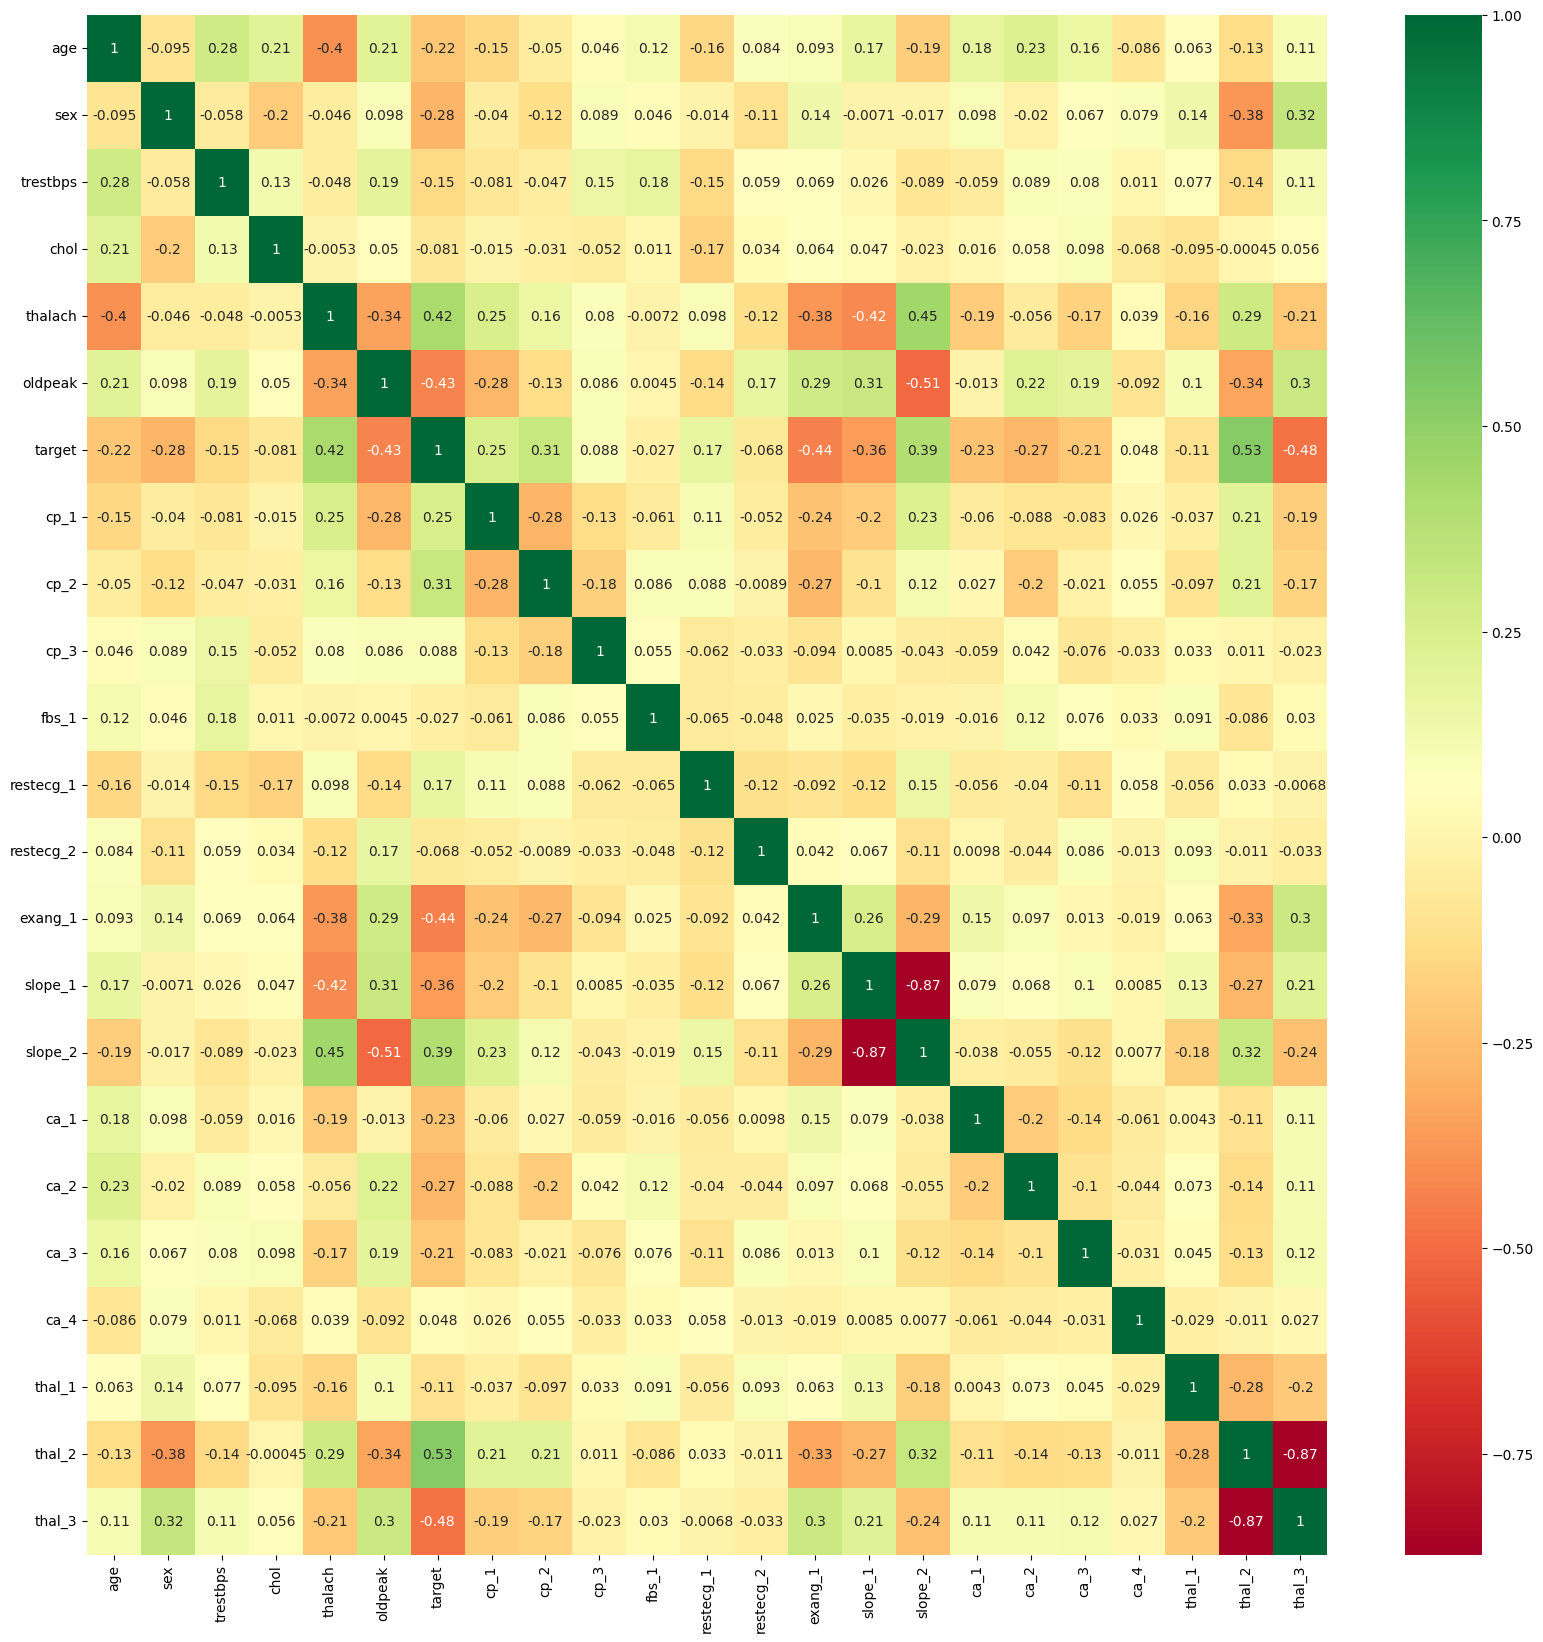

In [21]:
#to check whether the features are correlated or not
cormat = data.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
#plot the heat map
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'oldpeak'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 2000x2000 with 0 Axes>

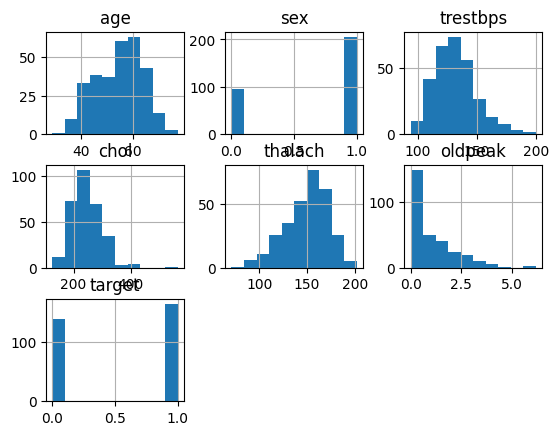

In [22]:
plt.figure(figsize=(20,20))
data.hist()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23628\1936083705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette = "RdBu_r")


<Axes: xlabel='target', ylabel='count'>

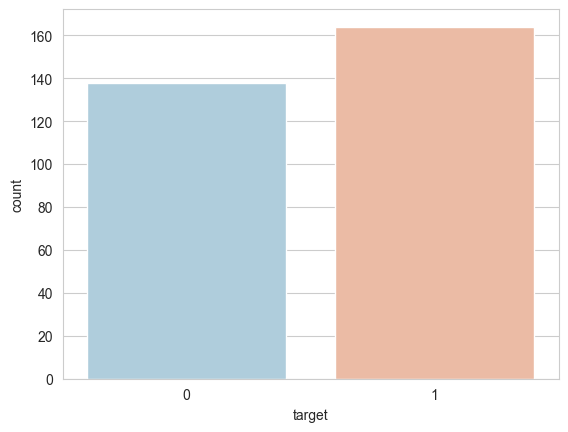

In [23]:
#Checking the Balance of the dataset
sns.set_style("whitegrid")
sns.countplot(x='target', data=data, palette = "RdBu_r")

In [24]:
from sklearn.preprocessing import StandardScaler
#standardize the input data in a way that ensures that the data points have a balanced scale

In [25]:
st = StandardScaler()
data[continous_val] = st.fit_transform(data[continous_val])

In [26]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 8. Splitting The Dataset Into The Training Set And Test Set

In [27]:
X = data.drop('target',axis=1)

In [28]:
y = data['target']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [31]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

### 9. Logistic Regression

In [32]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred1 = log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

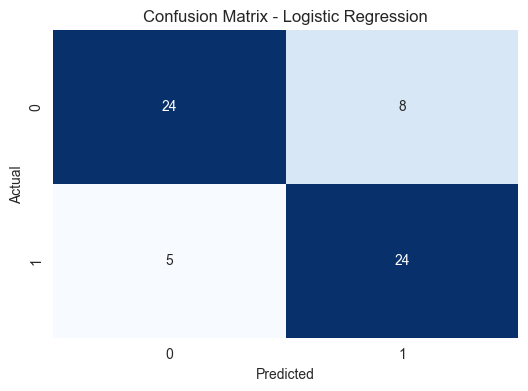

In [38]:
plot_confusion_matrix(y_test, y_pred1, 'Confusion Matrix - Logistic Regression')

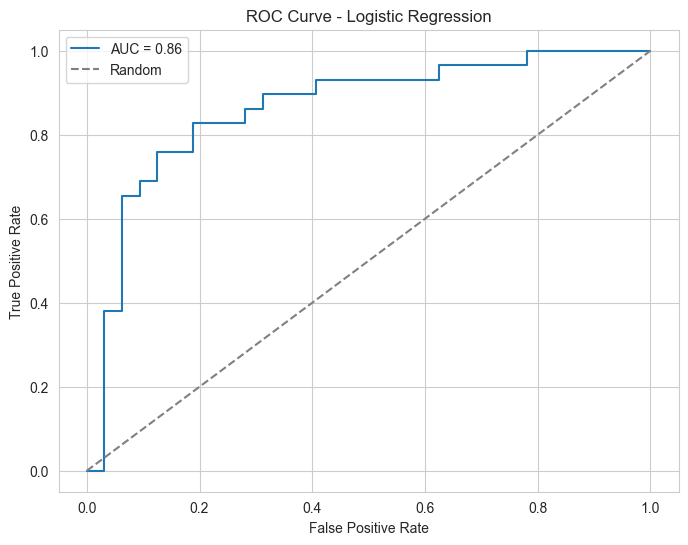

In [39]:
y_probs_lr = log.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_probs_lr, 'ROC Curve - Logistic Regression')

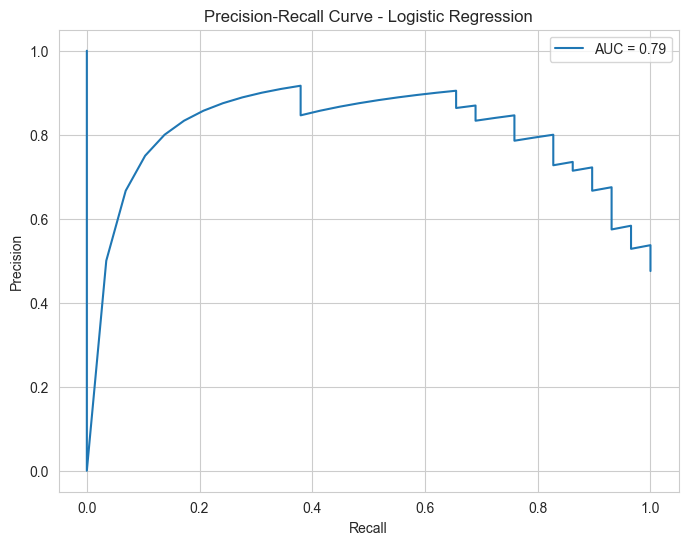

In [40]:
plot_precision_recall_curve(y_test, y_probs_lr, 'Precision-Recall Curve - Logistic Regression')

### 10. SVC

In [41]:
from sklearn import svm

In [42]:
svm = svm.SVC()

In [43]:
svm.fit(X_train,y_train)

SVC()

In [44]:
y_pred2 = svm.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

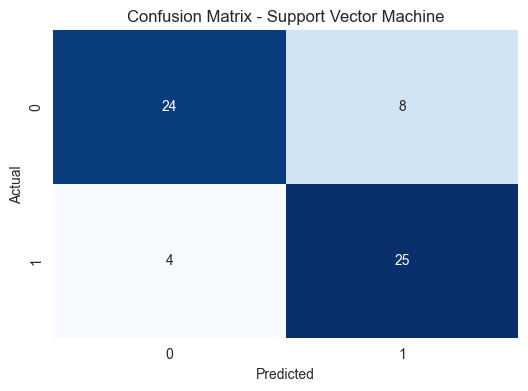

In [46]:
plot_confusion_matrix(y_test, y_pred2, 'Confusion Matrix - Support Vector Machine')
#an N x N matrix used for evaluating the performance of a classification model

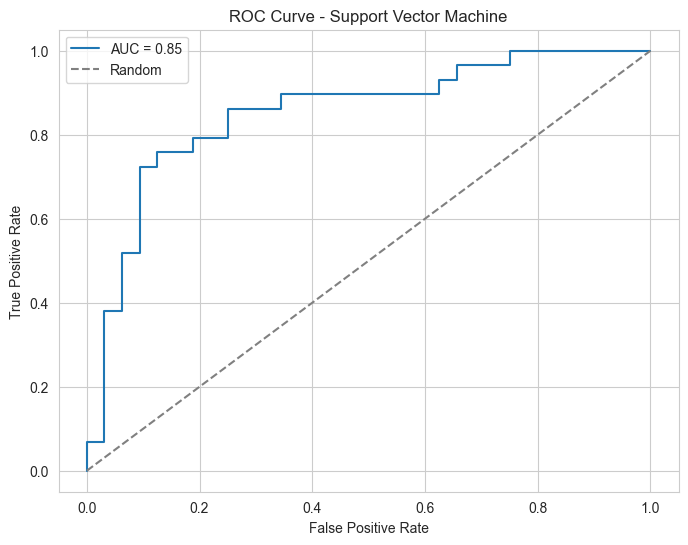

In [47]:
y_probs_svm = svm.decision_function(X_test)
plot_roc_curve(y_test, y_probs_svm, 'ROC Curve - Support Vector Machine')

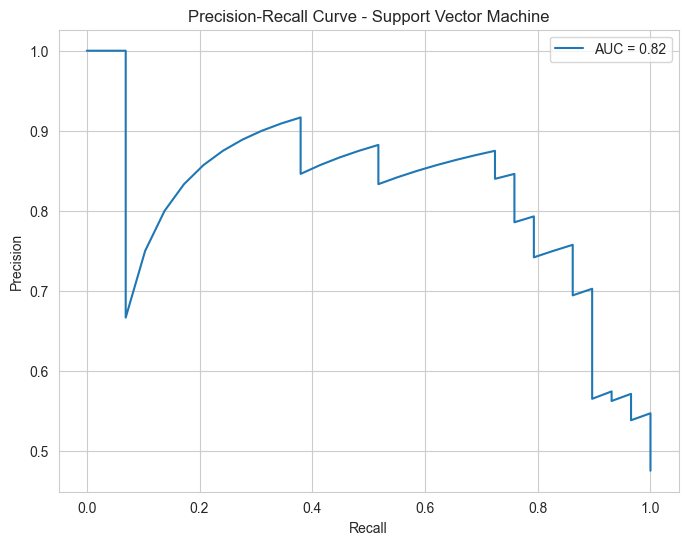

In [48]:
plot_precision_recall_curve(y_test, y_probs_svm, 'Precision-Recall Curve - Support Vector Machine')

### 11. KNeighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred3=knn.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

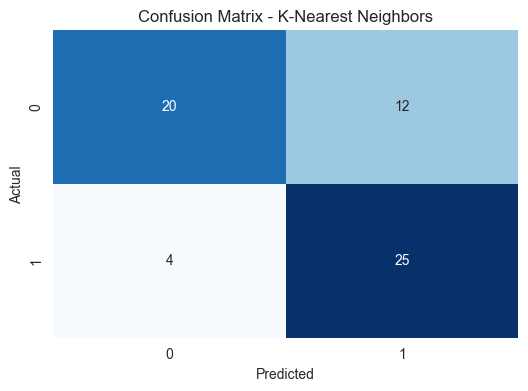

In [54]:
plot_confusion_matrix(y_test, y_pred3, 'Confusion Matrix - K-Nearest Neighbors')

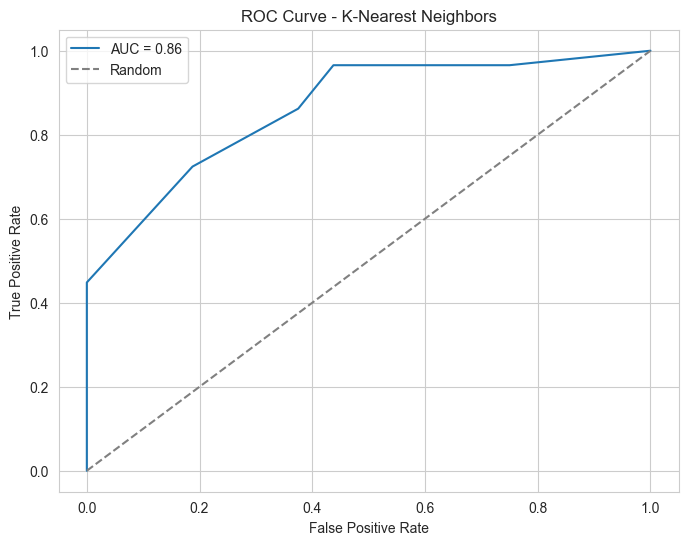

In [55]:
y_probs_knn = knn.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_probs_knn, 'ROC Curve - K-Nearest Neighbors')

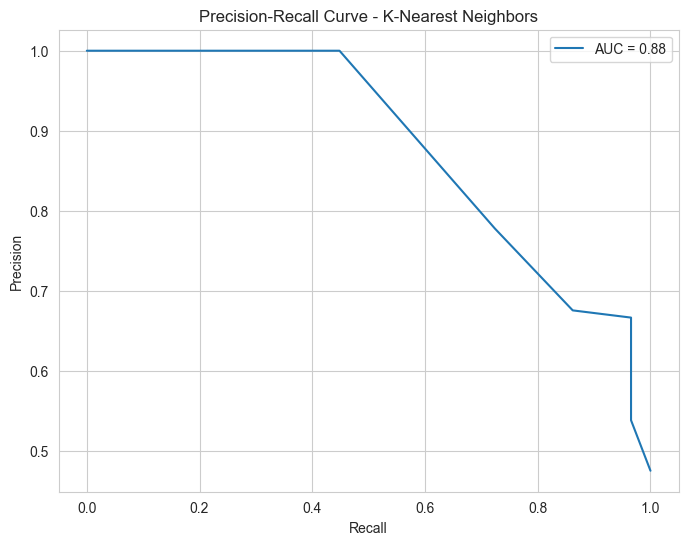

In [56]:
plot_precision_recall_curve(y_test, y_probs_knn, 'Precision-Recall Curve - K-Nearest Neighbors')

In [57]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [58]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

Text(0.5, 1.0, 'K Neigbors Classifier for different K Values')

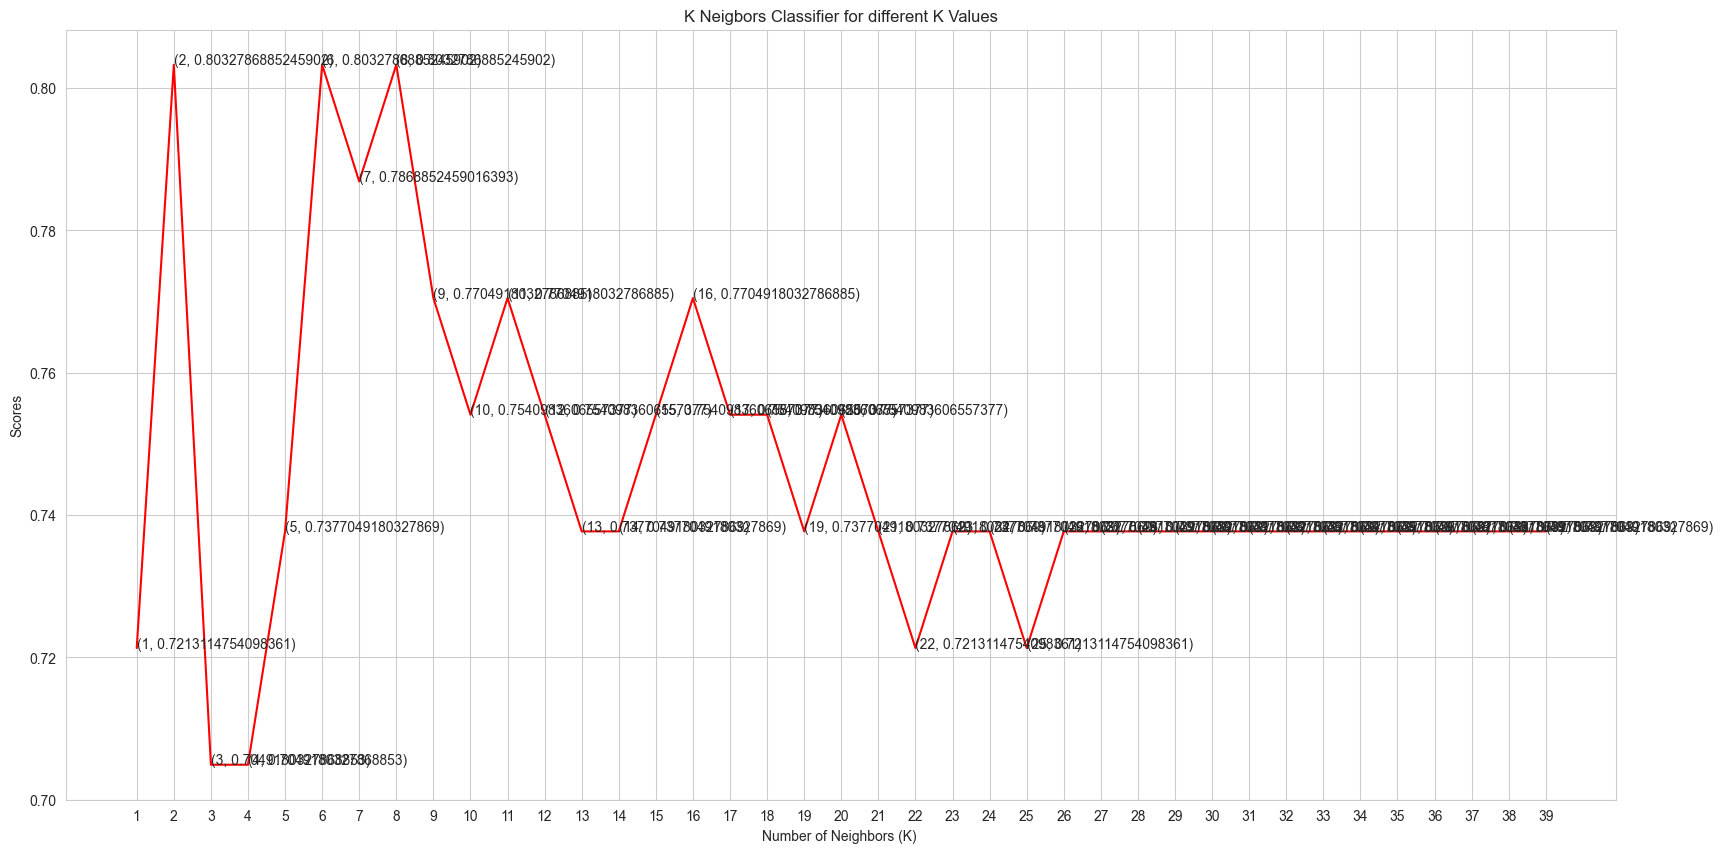

In [59]:
plt.figure(figsize = (20,10))
plt.plot([k for k in range(1,40)], score, color='Red')
for i in range(1,40):
    plt.text(i, score[i-1], (i, score[i-1]))
plt.xticks([i for i in range(1,40)])
plt.xlabel("Number of Neighbors (K) ")
plt.ylabel("Scores")
plt.title("K Neigbors Classifier for different K Values")

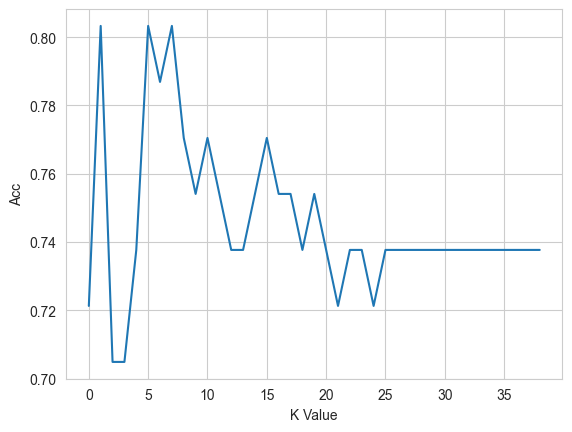

In [60]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [61]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [62]:
accuracy_data = pd.DataFrame({'LR': [accuracy_score(y_test, y_pred1)],
                              'SVM': [accuracy_score(y_test, y_pred2)],
                              'KNN': [accuracy_score(y_test, y_pred3)]})


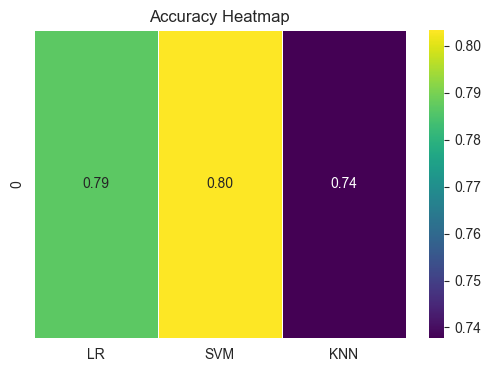

In [63]:
plot_heatmap(accuracy_data, 'Accuracy Heatmap')

In [64]:
f_data = pd.DataFrame({'Models':['LR','SVM','KNN'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100]})

In [65]:
f_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492


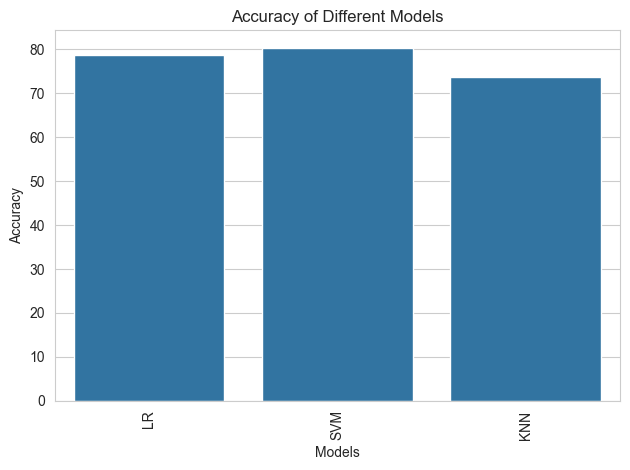

In [66]:
sns.barplot(x='Models', y='ACC', data=f_data)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

### Non-Linear ML Algorithms

In [67]:
data1 = pd.read_csv("D:/presidency university/4th year/Project/heart.csv")
data2 = pd.read_csv("D:/presidency university/4th year/Project/heartttt.csv")
#data3 = pd.read_csv("D:/presidency university/4th year/Project/Heart_disease_statlog.csv")
data= pd.concat([data1, data2], axis=0)

In [68]:
data = data.drop_duplicates()

In [69]:
X = data.drop('target',axis=1)
y=data['target']

In [70]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### 12. Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt = DecisionTreeClassifier()

In [73]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred4= dt.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

### 13. Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier()

In [78]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,44,1,1,130,219,0,0,188,0,0.0,2,0,2
349,62,0,2,130,263,0,1,97,0,1.2,1,1,3
135,58,0,0,170,225,1,0,146,1,2.8,1,2,1
389,63,1,3,145,233,1,0,150,0,2.3,0,0,1
66,53,1,2,130,197,1,0,152,0,1.2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,70,1,1,156,245,0,0,143,0,0.0,2,0,2
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
274,66,1,0,160,228,0,0,138,0,2.3,2,0,1


In [80]:
y_pred5= rf.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

### 14. Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gbc = GradientBoostingClassifier()

In [84]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [85]:
y_pred6 = gbc.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [87]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [88]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,70.491803
4,RF,85.245902
5,GB,80.327869


In [89]:
import seaborn as sns

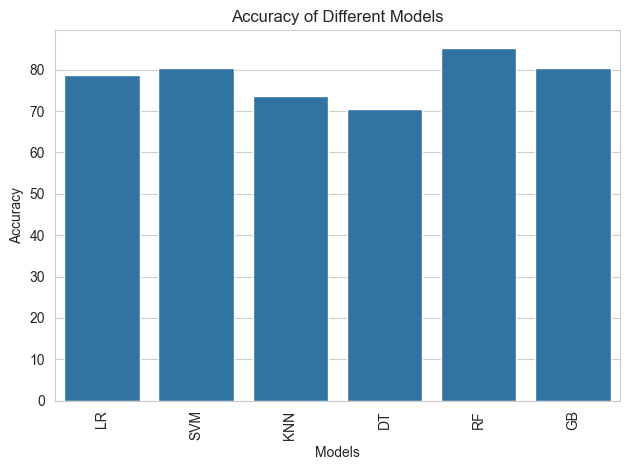

In [90]:
sns.barplot(x='Models', y='ACC', data=final_data)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [91]:
X=data.drop('target',axis=1)
y=data['target']

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### 15. Prediction on New Data

In [94]:
import pandas as pd

In [95]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':120,
    'chol':150,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':1,
    'ca':2,
    'thal':3,    
},index=[0])

In [96]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,120,150,0,1,168,0,1.0,1,2,3


In [106]:
p = rf.predict(new_data)
if p[0]<=0.5:
    print("No Disease")
else:
    print("Disease")

No Disease


### 16. Save Model Using Joblib

In [99]:
import joblib
#Joblib is a set of tools to provide lightweight pipelining in Python

In [100]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [101]:
model = joblib.load('model_joblib_heart')

In [102]:
model.predict(new_data)

array([0], dtype=int64)

In [103]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### GUI

In [108]:
from tkinter import *
import joblib
import pandas as pd
import os

def export_to_excel(p_values, result):
    file_path = "D:\downloads\heartPatients.xlsx"
    
    # Check if the Excel file exists
    if os.path.exists(file_path):
        # Load existing data
        data = pd.read_excel(file_path)
        if not isinstance(data, pd.DataFrame):  # Ensure data is DataFrame
            data = pd.DataFrame(data)
    else:
        # Create an empty DataFrame if the file doesn't exist
        data = pd.DataFrame(columns=[
            "age", "sex", "cp", "trestbps",
            "chol", "fbs", "restecg", "thalach",
            "exang", "oldpeak", "slope", "ca",
            "thal", "target"
        ])

    # Create a dictionary with column names as keys and values from p_values + result as values
    new_entry = {
        "age": p_values[0], "sex": p_values[1], "cp": p_values[2],
        "trestbps": p_values[3], "chol": p_values[4],
        "fbs": p_values[5], "restecg": p_values[6],
        "thalach": p_values[7], "exang": p_values[8],
        "oldpeak": p_values[9], "slope": p_values[10], "ca": p_values[11],
        "thal": p_values[12], "target": result
    }

    # Create a DataFrame for the new entry
    new_data = pd.DataFrame([new_entry])

    # Concatenate the new entry DataFrame with the existing DataFrame
    data = pd.concat([data, new_data], ignore_index=True)
    
    # Export the updated DataFrame to an Excel file
    data.to_excel(file_path, index=False)
    print("Data appended to heartPatients.xlsx")


def show_entry_fields():
    p_values = [int(entry.get()) if i != 9 else float(entry.get()) for i, entry in enumerate(entries)]
    
    model = joblib.load('model_joblib_heart')
    result = model.predict([p_values])[0]  # Get the predicted value from the array
    
    result_label.config(text="Possibility of Heart Disease" if result >= 0.5 else "No Heart Disease", fg="blue")
    
    # Export the entries and prediction to an Excel file
    export_to_excel(p_values, result)

master = Tk()
master.title("Heart Disease Prediction System")

# Styles
label_style = {'bg': 'green', 'fg': 'yellow', 'font': ('Colonna MT', 22)}
entry_style = {'fg': 'blue', 'font': ('Cascadia Code SemiLight', 9)}
result_style = {'fg': 'red', 'font': ('Comic Sans MS', 12)}

# Title label
label = Label(master, text="Heart Disease Prediction System", **label_style)
label.grid(row=0, columnspan=2)

# Entry labels
entry_labels = [
    "Enter Your Age:", 
    "Enter the person’s sex: \n(1 = male, 0 = female)", 
    "Chest Pain type: (0: asymptomatic   1: atypical angina \n\t\t2: non-anginal pain   3: typical angina)", 
    "Enter Resting Blood Pressure:\n(mm Hg on admission to the hospital)",
    "Enter Value of cholestrol(normal range(less than 200 mg/dL):\n(200 to 239 mg/dL  is borderline high)(240 mg/dL is high.(measurement in mg/dl)", 
    "Enter Fasting Blood Sugar Value:\n(> 120 mg/dl, 1 = true; 0 = false)", 
    "Enter Resting Electrocardiographic Results:(0: showing probable or definite left ventricular hypertrophy by Estes’ criteria \n1: normal \n2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))", 
    "Enter Maximum Heart Rate Achieved:",
    "Enter Exercise Induced Angina:\n(1 = yes; 0 = no)", 
    "Enter Value of oldpeak:", 
    "Enter Value of slope:\n(0: upsloping; \n1: flat; \n2: downsloping)", 
    "Enter Number of Major Vessels (0-3)",
    "Thal:\n(0: NULL (dropped from the dataset previously)   1: fixed defect (no blood flow in some part of the heart) \n2: normal blood flow   3: reversible defect (a blood flow is observed but it is not normal))"
]
for i, entry_label in enumerate(entry_labels):
    Label(master, text=entry_label, **entry_style).grid(row=i + 1, column=0, sticky=W, pady=5)

# Entry widgets
entries = []
for i in range(13):
    entry = Entry(master, **result_style)
    entry.grid(row=i + 1, column=1, pady=5)
    entries.append(entry)

# Result label
result_label = Label(master, text="", fg="red", font=('Comic Sans MS', 12))
result_label.grid(row=14, columnspan=2, pady=10)

# Buttons
Button(master, text='Predict', command=show_entry_fields, **result_style).grid(row=15, column=0, pady=20)
Button(master, text='Reset', command=lambda: [entry.delete(0, 'end') for entry in entries] + [result_label.config(text="", fg="black")],**result_style).grid(row=15, column=1, pady=20)

mainloop()
